<a href="https://colab.research.google.com/github/GregoryG3/Thesis/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and loading Google drive

In [3]:
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
PROJECT_DIR = "/content/drive/MyDrive/Thesis/Dataset"
PROCESSED_DIR = join(PROJECT_DIR, "processed")

# Load data

In [7]:
ratings = pd.read_csv(join(PROCESSED_DIR, "ratings.csv"), low_memory=False)
profiles = pd.read_csv(join(PROCESSED_DIR, "profiles_df.csv"), low_memory=False)

# Likert plot

In [ ]:
def likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix=""):
    for var in df.columns:
        if var in exclude:
            continue
        else:
            unique = df[var].unique()
            f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,5))
            # From raw value to percentage
            totals = df[var].value_counts(dropna=False).sort_index()
            unsafe_bars = (df[df["rating"] == 0][var].value_counts(dropna=False)/totals * 100).sort_index()
            almost_unsafe_bars = (df[df["rating"] == 1][var].value_counts(dropna=False)/totals * 100).sort_index()
            almost_safe_bars = (df[df["rating"] == 2][var].value_counts(dropna=False)/totals * 100).sort_index()
            safe_bars = (df[df["rating"] == 3][var].value_counts(dropna=False)/totals * 100).sort_index()
            # plot
            barWidth = 0.99
            names = totals.index
            r = list(range(unique.shape[0]))
            # Create grey Bars
            buttom = totals/totals * 100
            ax1.barh(r, buttom, color='#33cc33', edgecolor='white', height=barWidth)
            # Create blue Bars
            buttom = buttom - safe_bars
            ax1.barh(r, buttom, color='#336600', edgecolor='white', height=barWidth)
            # Create orange Bars
            buttom = buttom - almost_safe_bars
            ax1.barh(r, buttom, color='#cc0000', edgecolor="white", height=barWidth)
            # Create green Bars
            buttom = buttom - almost_unsafe_bars
            ax1.barh(r, buttom, color='#ff3300', edgecolor='white', height=barWidth)
            # Custom x axis
            plt.yticks(r, unsafe_bars.index)

            ax2.barh(r, totals)
            # ax2.tick_params(
            #     axis='x',          # changes apply to the x-axis
            #     which='both',      # both major and minor ticks are affected
            #     bottom=False,      # ticks along the bottom edge are off
            #     top=False,         # ticks along the top edge are off
            #     labelbottom=False) # labels along the bottom edge are off
            plt.title(var)
            plt.tight_layout()
            #plt.savefig("plots/likert/" + filename_prefix + "_" + var + ".png")
            plt.show()

# Scene 01_SE_C_65
**Characterisitcs:**<br>
bicycleStreetType: green_surface <br>
FS type (Directions of travel): one-way street (Bicycle along one-way street)<br>
Special features: bicycle lane (Hollandaise)<br>
FS width (width of the road): narrow  3.50 m<br>
Parking: no <br>
Traffic volume: car-free<br>


Let's filter our data to scene SE_C_65

In [18]:
ratings_scene = ratings[['scene_id','sessionID','rating']][ratings['scene_id']=='01_SE_C_65']
df_scene = pd.merge(ratings_scene, profiles, on="sessionID")

In [19]:
informaiontion_value = []

for kolumna in df_scene.columns:
    wartosci = df_scene[kolumna].value_counts()
    suma_wystapien = wartosci.sum()
    informaiontion_value.append({
        'Nazwa kolumny': kolumna,
        'Wartosc': wartosci.index,
        'Liczba wystapien': wartosci.values,
        'Suma wystapien': suma_wystapien
    })

df_info = pd.DataFrame(informaiontion_value)
df_info

,Nazwa kolumny,Wartosc,Liczba wystapien,Suma wystapien
0,scene_id,"Index(['01_SE_C_65'], dtype='object', name='sc...",[474],474
1,sessionID,"Index(['25d366e0-05b4-444d-98e8-b2e0e4866389',...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",474
2,rating,"Index([3.0, 2.0, 1.0, 0.0], dtype='float64', n...","[394, 57, 19, 4]",474
3,Unnamed: 0,"Index([ 1, 7967, 8287, 8246, 8171, 814...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",474
4,gender,"Index(['m', 'w', 'd'], dtype='object', name='g...","[333, 132, 9]",474
...,...,...,...,...
92,introSelection_sharingConditions,"Index([1.0], dtype='float64', name='introSelec...",[64],64
93,introSelection_sharingModes,"Index([1.0], dtype='float64', name='introSelec...",[65],65
94,introSelection_offended,"Index([1.0], dtype='float64', name='introSelec...",[60],60
95,introSelection_annoyingTraffic,"Index([1.0], dtype='float64', name='introSelec...",[33],33


In [20]:
pd.set_option('display.max_columns', 95)
df_scene

,scene_id,sessionID,rating,Unnamed: 0,gender,zipcode,ageGroup,district,state,userGroup,bicycleUse,hasChildren,perspective,bikeReasonsVar,offended,annoyingTraffic,berlinTraffic_noise,berlinTraffic_rules,berlinTraffic_traffic,berlinTraffic_polution,berlinTraffic_aggression,berlinTraffic_maintenance,berlinTraffic_accidents,berlinTraffic_0,motivationalFactors_safe,motivationalFactors_faster,motivationalFactors_bikefun,motivationalFactors_weather,transportRatings_car,transportRatings_public,transportRatings_bicycle,transportRatings_motorbike,transportRatings_pedestrian,responsible_0,climateTraffic_0,climateTraffic_ice,climateTraffic_tolls,climateTraffic_public,climateTraffic_sharing,climateTraffic_bigCarTax,climateTraffic_cyclePaths,climateTraffic_tempolimit,climateTraffic_pedestrianSpace,climateTraffic_chargers,sharingConditions_0,sharingConditions_limits,sharingConditions_subsidy,...,sharingModes_0,sharingModes_car,sharingModes_bikes,sharingModes_bigscooter,sharingModes_transportbikes,sharingModes_ridesharing,sharingModes_vans,sharingModes_scooter,sharingModes_nada,saveSpace_0,saveSpace_carlanes,saveSpace_carparking,saveSpace_green,saveSpace_cyclewidth,saveSpace_pedestrianwidth,saveSpace_buslanes,saveSpace_nada,annoyingPeople_0,annoyingPeople_overtake,annoyingPeople_parkingViolations,annoyingPeople_phones,annoyingPeople_tailgate,annoyingPeople_speeding,annoyingPeople_rightOfWay,annoyingPeople_trafficLights,bikeReasons_infrastructure,bikeReasons_8,bikeReasons_distance,bikeReasons_children,bikeReasons_equipment,bikeReasons_skills,bikeReasons_physicalStrain,bikeReasons_social,vehiclesOwned_bicycle,vehiclesOwned_carsharing,vehiclesOwned_public,vehiclesOwned_car,vehiclesOwned_pedelec,vehiclesOwned_motorbike,introSelection_responsible,introSelection_climateTraffic,introSelection_annoyingPeople,introSelection_sharingConditions,introSelection_sharingModes,introSelection_offended,introSelection_annoyingTraffic,introSelection_saveSpace
0,01_SE_C_65,25d366e0-05b4-444d-98e8-b2e0e4866389,3.0,1,m,12055,4.0,Neukölln,Berlin,bicycle,1.0,False,C,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True,NaN,3.0,4.0,4.0,0.0,2,3,5,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01_SE_C_65,511f28b9-6d78-4e8d-a9a7-63fce06cce66,3.0,5,m,13503,5.0,Reinickendorf,Berlin,bicycle,3.0,False,C,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,NaN,NaN,3.0,4.0,4.0,0.0,3,2,5,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01_SE_C_65,e3dde0bb-ebbf-49fe-be87-4e2e6bf044bb,3.0,16,m,10967,3.0,Neukölln,Berlin,bicycle,2.0,True,C,NaN,NaN,NaN,NaN,True,NaN,True,True,True,NaN,NaN,2.0,4.0,4.0,0.0,0,2,5,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01_SE_C_65,ee2ac657-9da8-4b7d-a84a-91213e182830,3.0,20,m,13357,4.0,Mitte,Berlin,pedestrian,NaN,False,P,Aggressivität im Straßenverkehr,NaN,NaN,NaN,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,1,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01_SE_C_65,63815a0c-c726-4726-b4f6-41cbb50043c1,3.0,27,w,10829,3.0,Tempelhof-Schöneberg,Berlin,bicycle,2.0,False,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,2.0,4.0,4.0,0.0,1,2,5,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [21]:
col_delete = ['scene_id', 'Unnamed: 0', 'bikeReasonsVar', 'offended', 'zipcode',
              'annoyingTraffic', 'offended', 'responsible_0',
              'climateTraffic_0', 'climateTraffic_ice', 'climateTraffic_tolls', 'climateTraffic_public',
              'climateTraffic_sharing', 'climateTraffic_bigCarTax', 'climateTraffic_cyclePaths',
              'climateTraffic_tempolimit', 'climateTraffic_pedestrianSpace', 'climateTraffic_chargers',
              'sharingConditions_0', 'sharingConditions_limits', 'sharingConditions_subsidy',
              'sharingConditions_sharingstations', 'sharingConditions_parking', 'sharingConditions_sidewalk',
              'sharingModes_0', 'sharingModes_car', 'sharingModes_bikes', 'sharingModes_bigscooter',
              'sharingModes_transportbikes', 'sharingModes_ridesharing', 'sharingModes_vans',
              'sharingModes_scooter', 'sharingModes_nada', 'saveSpace_0', 'saveSpace_carlanes',
              'saveSpace_carparking', 'saveSpace_green', 'saveSpace_cyclewidth',
              'saveSpace_pedestrianwidth', 'saveSpace_buslanes', 'saveSpace_nada',
              'annoyingPeople_0', 'annoyingPeople_overtake', 'annoyingPeople_parkingViolations',
              'annoyingPeople_phones', 'annoyingPeople_tailgate', 'annoyingPeople_speeding',
              'annoyingPeople_rightOfWay', 'annoyingPeople_trafficLights',
              'introSelection_climateTraffic', 'introSelection_annoyingPeople',
              'introSelection_sharingConditions', 'introSelection_sharingModes',
              'introSelection_offended', 'introSelection_annoyingTraffic',
              'introSelection_saveSpace', 'introSelection_responsible',
              'berlinTraffic_0', # have all NaN
              'bikeReasons_infrastructure', 'bikeReasons_8', 'bikeReasons_distance', # I will treat it like person without bike
              'bikeReasons_children', 'bikeReasons_equipment', 'bikeReasons_skills',
              'bikeReasons_physicalStrain', 'bikeReasons_social']

df_scene = df_scene.drop(columns=col_delete)

In [22]:
berlinTraffic_col = ['berlinTraffic_noise', 'berlinTraffic_rules', 'berlinTraffic_traffic',
                   'berlinTraffic_polution', 'berlinTraffic_aggression', 'berlinTraffic_maintenance',
                   'berlinTraffic_accidents']

df_scene['berlinTraffic_check'] = df_scene[berlinTraffic_col].notnull().any(axis=1).astype(int)

df_scene['berlinTraffic_check'].value_counts()

berlinTraffic_check
1    382
0     92
Name: count, dtype: int64

In [23]:
vehicle_col = ['vehiclesOwned_bicycle', 'vehiclesOwned_carsharing',
       'vehiclesOwned_public', 'vehiclesOwned_car', 'vehiclesOwned_pedelec',
       'vehiclesOwned_motorbike' ]

df_scene['vehicle_check'] = df_scene[vehicle_col].notnull().any(axis=1).astype(int)

df_scene['vehicle_check'].value_counts()

vehicle_check
1    472
0      2
Name: count, dtype: int64

In [24]:
motiv_col = ['motivationalFactors_safe', 'motivationalFactors_faster',
               'motivationalFactors_bikefun', 'motivationalFactors_weather']

df_scene['motivational_check'] = df_scene[motiv_col].notnull().any(axis=1).astype(int)

df_scene['motivational_check'].value_counts()

motivational_check
1    350
0    124
Name: count, dtype: int64

In [25]:
df_scene['state_new'] = df_scene['state'].apply(lambda x: 'Berlin' if x == 'Berlin' else 'Other' if pd.notna(x) else 0)
df_scene['state_new'].value_counts()

state_new
Berlin    421
Other      46
0           7
Name: count, dtype: int64

In [26]:
df_scene_filter = df_scene[(df_scene['vehicle_check']==1) &
                          (df_scene['berlinTraffic_check']==1) &
                          (df_scene['state_new'] !=0) ] #&
                          # (df_scene['motivational_check'] !=0)]

Let's fill in the NaN values ​​in the columns 'vehiclesOwned' and 'berlinTraffic' with 0 and False

In [27]:
df_scene_filter[berlinTraffic_col] = df_scene_filter[berlinTraffic_col].fillna(False)
df_scene_filter[vehicle_col] = df_scene_filter[vehicle_col].fillna(0)



<ipython-input-27-cbf66839fed1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scene_filter[berlinTraffic_col] = df_scene_filter[berlinTraffic_col].fillna(False)
<ipython-input-27-cbf66839fed1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scene_filter[vehicle_col] = df_scene_filter[vehicle_col].fillna(0)


Change value True to 1 and False to 0


In [28]:
df_scene_filter[berlinTraffic_col] = df_scene_filter[berlinTraffic_col].replace({True: 1, False: 0})
df_scene_filter['hasChildren'] = df_scene_filter['hasChildren'].astype(int)


<ipython-input-28-86a7d097c1cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scene_filter[berlinTraffic_col] = df_scene_filter[berlinTraffic_col].replace({True: 1, False: 0})
<ipython-input-28-86a7d097c1cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scene_filter['hasChildren'] = df_scene_filter['hasChildren'].astype(int)


Delete the coliumns which we use to verfication

In [29]:
df_scene_filter = df_scene_filter.drop(columns=['vehicle_check', 'berlinTraffic_check', 'motivational_check'])

In [31]:
df_scene_filter.head()

,sessionID,rating,gender,ageGroup,district,state,userGroup,bicycleUse,hasChildren,perspective,berlinTraffic_noise,berlinTraffic_rules,berlinTraffic_traffic,berlinTraffic_polution,berlinTraffic_aggression,berlinTraffic_maintenance,berlinTraffic_accidents,motivationalFactors_safe,motivationalFactors_faster,motivationalFactors_bikefun,motivationalFactors_weather,transportRatings_car,transportRatings_public,transportRatings_bicycle,transportRatings_motorbike,transportRatings_pedestrian,vehiclesOwned_bicycle,vehiclesOwned_carsharing,vehiclesOwned_public,vehiclesOwned_car,vehiclesOwned_pedelec,vehiclesOwned_motorbike,state_new
0,25d366e0-05b4-444d-98e8-b2e0e4866389,3.0,m,4.0,Neukölln,Berlin,bicycle,1.0,0,C,0,0,0,1,0,1,1,3.0,4.0,4.0,0.0,2,3,5,1,3,1.0,1.0,0.0,0.0,0.0,0.0,Berlin
1,511f28b9-6d78-4e8d-a9a7-63fce06cce66,3.0,m,5.0,Reinickendorf,Berlin,bicycle,3.0,0,C,0,1,0,0,1,1,0,3.0,4.0,4.0,0.0,3,2,5,0,3,1.0,0.0,0.0,1.0,0.0,0.0,Berlin
2,e3dde0bb-ebbf-49fe-be87-4e2e6bf044bb,3.0,m,3.0,Neukölln,Berlin,bicycle,2.0,1,C,0,1,0,1,1,1,0,2.0,4.0,4.0,0.0,0,2,5,0,3,1.0,0.0,0.0,0.0,1.0,0.0,Berlin
3,ee2ac657-9da8-4b7d-a84a-91213e182830,3.0,m,4.0,Mitte,Berlin,pedestrian,NaN,0,P,0,1,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,1,0,5,0.0,0.0,1.0,0.0,0.0,0.0,Berlin
4,63815a0c-c726-4726-b4f6-41cbb50043c1,3.0,w,3.0,Tempelhof-Schöneberg,Berlin,bicycle,2.0,0,C,0,0,0,0,1,1,1,2.0,4.0,4.0,0.0,1,2,5,1,3,1.0,1.0,0.0,0.0,0.0,0.0,Berlin


# EDA

AGE

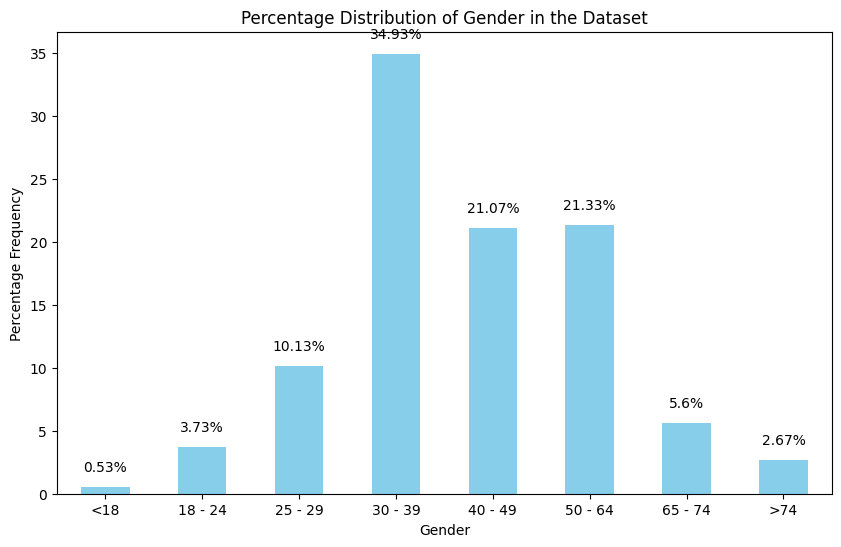

In [94]:
current = df_scene_filter["ageGroup"]
current = (current.value_counts() / current.shape[0]).sort_index() * 100

plt.figure(figsize=(10, 6))
# change labels
age_label= {0: '<18',
            1: '18 - 24',
            2: '25 - 29',
            3: '30 - 39',
            4: '40 - 49',
            5: '50 - 64',
            6: '65 - 74',
            7: '>74'}
current.index = current.index.map(age_label)

# Generate the bar plot
current.plot(kind="bar", color="skyblue")

# Add title and axis labels
plt.title("Percentage Distribution of Gender in the Dataset")
plt.xlabel("Gender")
plt.ylabel("Percentage Frequency")
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current):
    v_rounded = round(v, 2)
    plt.text(i, v + 1, str(v_rounded) + "%", ha='center', va='bottom')

plt.show()

GENDER

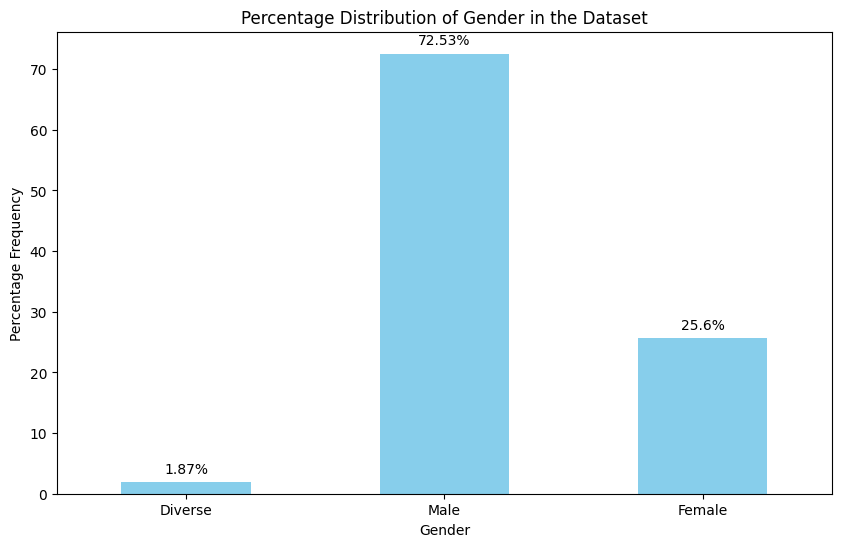

In [93]:
current = df_scene_filter["gender"]
current = 100*(current.value_counts()/current.shape[0]).round(4).sort_index()

plt.figure(figsize=(10, 6))
# change labels
label_mapping = {'w': 'Female', 'm': 'Male', 'd': 'Diverse'}
current.index = current.index.map(label_mapping)

current.plot(kind="bar", color="skyblue")
# Add title and axis labels
plt.title("Percentage Distribution of Gender in the Dataset")
plt.xlabel("Gender")
plt.ylabel("Percentage Frequency")
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current):
    plt.text(i, v + 1, str(v) + "%", ha='center', va='bottom')

plt.show()

Transport available for respondent:

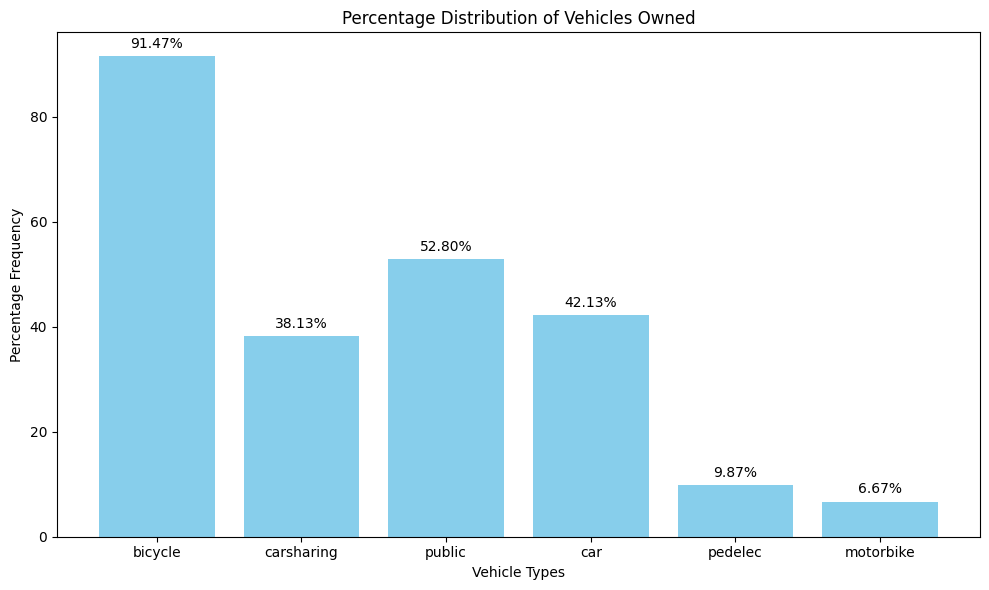

In [92]:
ve = "vehiclesOwned"
cols = []
vals = []
for col in df_scene_filter.columns:
    if ve in col:
        cols.append(col.split("_")[-1])
        val = 100 * (df_scene_filter[col].sum() / df_scene_filter[col].shape[0])
        vals.append(val)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(vals)), vals, color='skyblue')
plt.xticks(range(len(vals)), cols, rotation=0)
plt.xlabel('Vehicle Types')
plt.ylabel('Percentage Frequency')
plt.title('Percentage Distribution of Vehicles Owned')

# Add labels to the bars
for bar, val in zip(bars, vals):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{val:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

New State


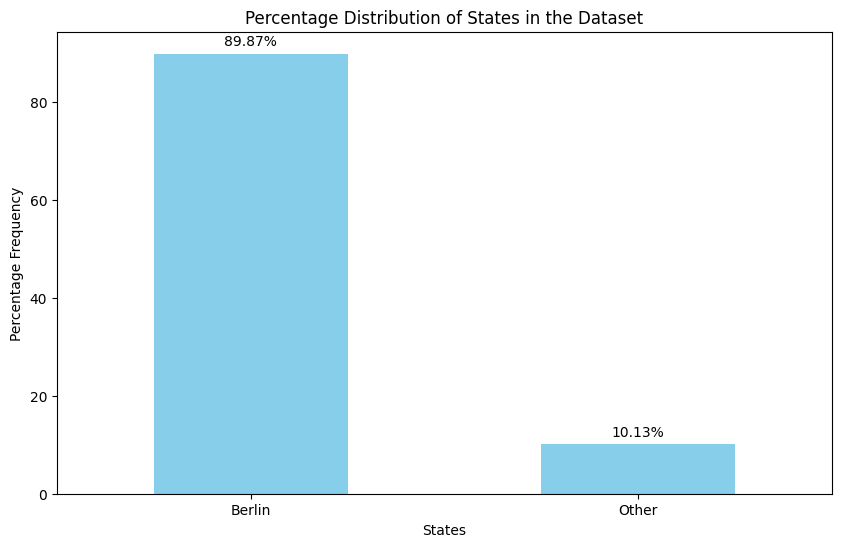

In [62]:
current = df_scene_filter["state_new"]
current_percentage = 100 * (current.value_counts() / current.shape[0]).round(4).sort_index()

plt.figure(figsize=(10, 6))

# Generate the bar plot
current_percentage.plot(kind="bar", color="skyblue")
# Add title and axis labels
plt.title("Percentage Distribution of States in the Dataset")
plt.xlabel("States")
plt.ylabel("Percentage Frequency")
# Rotate x-axis labels
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current_percentage):
    plt.text(i, v + 1, str(v) + "%", ha='center', va='bottom')

plt.show()

In [ ]:
#Wie häufig nutzen Sie
'''ratingLabels: [
      'Nie',
      'seltener als monatlich',
      '1-3 mal pro Monat',
      '1-3 mal pro Woche',
      '4-5 mal pro Woche',
      '(fast) täglich'''
# 3.4 Wege pro Tag

tr = "transportRatings"
for col in data.columns:
    if tr in col:
        plt.figure()
        plt.title(col)
        current = data[col]
        current = 100*(current.value_counts()/current.shape[0]).round(4).sort_index()
        print(current)
        current.plot(kind="bar")


# TEST segmentacja

In [160]:
# Wybierz tylko klientów, którzy oceniali produkty
rated_customers = df_scene_filter[df_scene_filter['rating'].notna()]

# Utwórz kopię danych z niepustymi wartościami, żeby nie modyfikować oryginalnych danych
rated_customers_copy = rated_customers.copy()

# Zakoduj zmienne kategoryczne przy pomocy kodowania one-hot
rated_customers_encoded = pd.get_dummies(rated_customers_copy, columns=['gender', 'state_new','userGroup'])


In [161]:
rated_customers_encoded

,sessionID,rating,zipcode,ageGroup,district,state,userGroup,bicycleUse,hasChildren,perspective,berlinTraffic_noise,berlinTraffic_rules,berlinTraffic_traffic,berlinTraffic_polution,berlinTraffic_aggression,berlinTraffic_maintenance,berlinTraffic_accidents,motivationalFactors_safe,motivationalFactors_faster,motivationalFactors_bikefun,motivationalFactors_weather,transportRatings_car,transportRatings_public,transportRatings_bicycle,transportRatings_motorbike,transportRatings_pedestrian,vehiclesOwned_bicycle,vehiclesOwned_carsharing,vehiclesOwned_public,vehiclesOwned_car,vehiclesOwned_pedelec,vehiclesOwned_motorbike,gender_d,gender_m,gender_w,state_new_Berlin,state_new_Other
0,25d366e0-05b4-444d-98e8-b2e0e4866389,3.0,12055,4.0,Neukölln,Berlin,bicycle,1.0,False,C,NaN,NaN,NaN,True,NaN,True,True,3.0,4.0,4.0,0.0,2,3,5,1,3,1.0,1.0,NaN,NaN,NaN,NaN,False,True,False,True,False
1,511f28b9-6d78-4e8d-a9a7-63fce06cce66,3.0,13503,5.0,Reinickendorf,Berlin,bicycle,3.0,False,C,NaN,True,NaN,NaN,True,True,NaN,3.0,4.0,4.0,0.0,3,2,5,0,3,1.0,NaN,NaN,1.0,NaN,NaN,False,True,False,True,False
2,e3dde0bb-ebbf-49fe-be87-4e2e6bf044bb,3.0,10967,3.0,Neukölln,Berlin,bicycle,2.0,True,C,NaN,True,NaN,True,True,True,NaN,2.0,4.0,4.0,0.0,0,2,5,0,3,1.0,NaN,NaN,NaN,1.0,NaN,False,True,False,True,False
4,63815a0c-c726-4726-b4f6-41cbb50043c1,3.0,10829,3.0,Tempelhof-Schöneberg,Berlin,bicycle,2.0,False,C,NaN,NaN,NaN,NaN,True,True,True,2.0,4.0,4.0,0.0,1,2,5,1,3,1.0,1.0,NaN,NaN,NaN,NaN,False,False,True,True,False
5,0ae9e0e9-8157-4c47-8b42-5121e674713a,1.0,12277,7.0,Tempelhof-Schöneberg,Berlin,potentialBicycle,2.0,False,C,True,True,True,True,True,True,True,0.0,2.0,3.0,2.0,1,1,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,c76d5be4-ea2d-4254-af74-6bf4e3951fae,3.0,15569,1.0,NaN,Brandenburg,potentialBicycle,1.0,False,C,True,True,NaN,NaN,NaN,True,NaN,3.0,4.0,4.0,1.0,1,4,5,0,4,1.0,NaN,1.0,1.0,NaN,NaN,False,True,False,False,True
378,18c3cd2b-fffc-4b2c-aead-47eec2b4d868,3.0,10319,1.0,Lichtenberg,Berlin,potentialBicycle,1.0,False,C,NaN,NaN,True,NaN,NaN,True,NaN,1.0,4.0,4.0,3.0,0,0,5,0,5,1.0,NaN,1.0,NaN,NaN,NaN,False,True,False,True,False
380,fc3a9c27-ce09-4638-86ce-a56eb7af6a6f,3.0,13187,3.0,Pankow,Berlin,potentialBicycle,2.0,False,C,NaN,NaN,NaN,True,True,True,NaN,0.0,4.0,3.0,1.0,0,4,3,0,3,1.0,1.0,1.0,NaN,NaN,NaN,False,False,True,True,False
381,25106dc4-255a-4470-8317-8dca821bcd54,2.0,16227,3.0,NaN,Brandenburg,potentialBicycle,1.0,False,C,NaN,True,NaN,NaN,True,True,NaN,4.0,3.0,4.0,1.0,3,5,5,0,3,1.0,1.0,1.0,NaN,NaN,NaN,False,True,False,False,True


In [207]:
df_scene_filter['bicycleUse'].value_counts()

bicycleUse
1.0    111
2.0     69
3.0     56
0.0     50
4.0      1
Name: count, dtype: int64

In [208]:
df_scene_filter['bicycleUse'].isna().sum()

88

In [209]:
df_scene_filter[df_scene_filter['berlinTraffic_noise']==False]

,sessionID,rating,gender,ageGroup,district,state,userGroup,bicycleUse,hasChildren,perspective,berlinTraffic_noise,berlinTraffic_rules,berlinTraffic_traffic,berlinTraffic_polution,berlinTraffic_aggression,berlinTraffic_maintenance,berlinTraffic_accidents,motivationalFactors_safe,motivationalFactors_faster,motivationalFactors_bikefun,motivationalFactors_weather,transportRatings_car,transportRatings_public,transportRatings_bicycle,transportRatings_motorbike,transportRatings_pedestrian,vehiclesOwned_bicycle,vehiclesOwned_carsharing,vehiclesOwned_public,vehiclesOwned_car,vehiclesOwned_pedelec,vehiclesOwned_motorbike,state_new
0,25d366e0-05b4-444d-98e8-b2e0e4866389,3.0,m,4.0,Neukölln,Berlin,bicycle,1.0,0,C,0,0,0,1,0,1,1,3.0,4.0,4.0,0.0,2,3,5,1,3,1.0,1.0,0.0,0.0,0.0,0.0,Berlin
1,511f28b9-6d78-4e8d-a9a7-63fce06cce66,3.0,m,5.0,Reinickendorf,Berlin,bicycle,3.0,0,C,0,1,0,0,1,1,0,3.0,4.0,4.0,0.0,3,2,5,0,3,1.0,0.0,0.0,1.0,0.0,0.0,Berlin
2,e3dde0bb-ebbf-49fe-be87-4e2e6bf044bb,3.0,m,3.0,Neukölln,Berlin,bicycle,2.0,1,C,0,1,0,1,1,1,0,2.0,4.0,4.0,0.0,0,2,5,0,3,1.0,0.0,0.0,0.0,1.0,0.0,Berlin
3,ee2ac657-9da8-4b7d-a84a-91213e182830,3.0,m,4.0,Mitte,Berlin,pedestrian,NaN,0,P,0,1,0,1,1,0,0,NaN,NaN,NaN,NaN,0,4,1,0,5,0.0,0.0,1.0,0.0,0.0,0.0,Berlin
4,63815a0c-c726-4726-b4f6-41cbb50043c1,3.0,w,3.0,Tempelhof-Schöneberg,Berlin,bicycle,2.0,0,C,0,0,0,0,1,1,1,2.0,4.0,4.0,0.0,1,2,5,1,3,1.0,1.0,0.0,0.0,0.0,0.0,Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,18c3cd2b-fffc-4b2c-aead-47eec2b4d868,3.0,m,1.0,Lichtenberg,Berlin,potentialBicycle,1.0,0,C,0,0,1,0,0,1,0,1.0,4.0,4.0,3.0,0,0,5,0,5,1.0,0.0,1.0,0.0,0.0,0.0,Berlin
379,2ae9da7f-7d9d-4d84-8b65-78b95ff50ec8,3.0,w,3.0,Charlottenburg-Wilmersdorf,Berlin,pedestrian,NaN,0,P,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,5,2,0,5,1.0,0.0,1.0,0.0,0.0,0.0,Berlin
380,fc3a9c27-ce09-4638-86ce-a56eb7af6a6f,3.0,w,3.0,Pankow,Berlin,potentialBicycle,2.0,0,C,0,0,0,1,1,1,0,0.0,4.0,3.0,1.0,0,4,3,0,3,1.0,1.0,1.0,0.0,0.0,0.0,Berlin
381,25106dc4-255a-4470-8317-8dca821bcd54,2.0,m,3.0,NaN,Brandenburg,potentialBicycle,1.0,0,C,0,1,0,0,1,1,0,4.0,3.0,4.0,1.0,3,5,5,0,3,1.0,1.0,1.0,0.0,0.0,0.0,Other


# Nowa sekcja

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Średnia ocena bezpieczeństwa dla każdego klastra:
cluster
0    3.0
1    0.0
2    1.0
Name: rating, dtype: float64


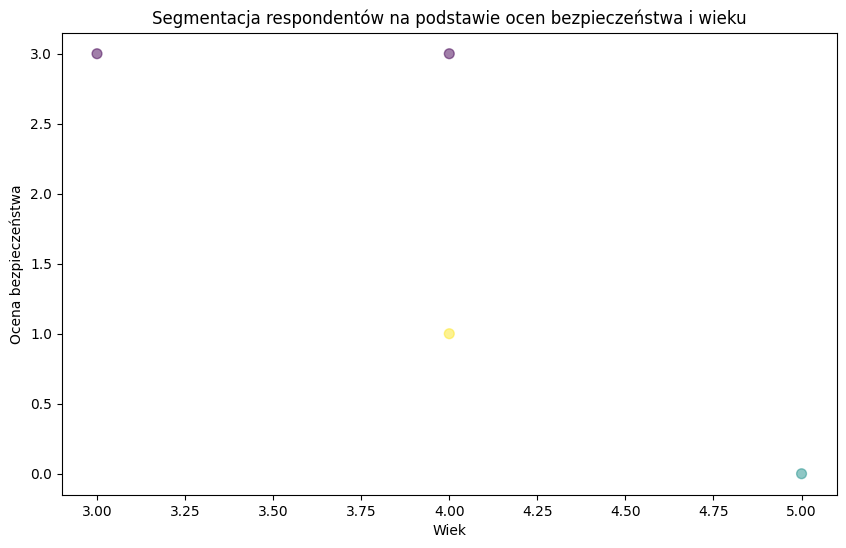

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytaj dane
data = {
    'respondent': ['25d366e0', '511f28b9', 'e3dde0bb', 'ee2ac657'],
    'rating': [3.0, 0.0, 3.0, 1.0],
    'gender': ['m', 'f', 'w', 'm'],
    'ageGroup': [4.0, 5.0, 3.0, 4.0],
    'userGroup': ['bicycle', 'car', 'bicycle', 'pedestrian'],
    'bicycleUse': [1.0, 3.0, 2.0, 0.0],
    'state_new': ['Berlin', 'Other', 'Berlin', 'Berlin']
}

df = pd.DataFrame(data)

# Przekształć dane kategoryczne na zmienne binarne
df = pd.get_dummies(df, columns=['gender', 'userGroup', 'state_new'])

# Standaryzuj dane
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['rating', 'ageGroup', 'bicycleUse']])

# Stwórz model klastrowania
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Analiza różnic w ocenach bezpieczeństwa dla każdego klastra
cluster_means = df.groupby('cluster')['rating'].mean()
print("Średnia ocena bezpieczeństwa dla każdego klastra:")
print(cluster_means)

# Wizualizacja klastrów na podstawie ocen bezpieczeństwa i wieku
plt.figure(figsize=(10, 6))
plt.scatter(df['ageGroup'], df['rating'], c=df['cluster'], cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Wiek')
plt.ylabel('Ocena bezpieczeństwa')
plt.title('Segmentacja respondentów na podstawie ocen bezpieczeństwa i wieku')
plt.show()

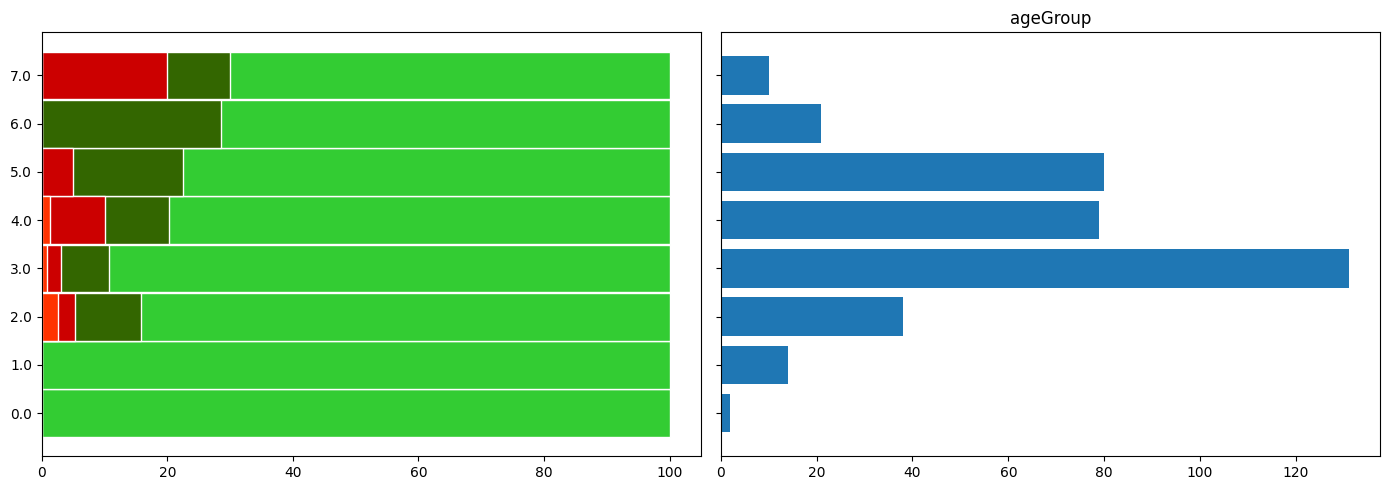

In [38]:
import matplotlib.pyplot as plt

width_features = ['ageGroup']  #"Tr_li-Breite", "Tr_re-Breite", "RVA-Breite", "GW-Breite", "FS-Breite"]
likert_plot(df_scene_filter[[*width_features, "rating"]])
